In [1]:
print('Thankyou Prodigy Infotech')

Thankyou Prodigy Infotech


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_column', None)

In [3]:
dataset=pd.read_csv(r"C:\Users\r7301\Downloads\ML projects\Prodigy_Infotech\p1\train.csv")

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## we have to predict the price based on their square footage and the number of bedrooms and bathrooms.

In [14]:
dataset['TotalBath'] = dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] + dataset['FullBath'] + dataset['HalfBath']


In [15]:
new_dataset = dataset[['LotArea', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBath','SalePrice']]

In [16]:
new_dataset.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
0,8450,856,3,8,4,208500
1,9600,1262,3,6,3,181500
2,11250,920,3,6,4,223500
3,9550,756,3,7,2,140000
4,14260,1145,4,9,4,250000


In [17]:
new_dataset.describe()

,LotArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1057.429452,2.866438,6.517808,2.430822,180921.195890
std,9981.264932,438.705324,0.815778,1.625393,0.922647,79442.502883
min,1300.000000,0.000000,0.000000,2.000000,1.000000,34900.000000
25%,7553.500000,795.750000,2.000000,5.000000,2.000000,129975.000000
50%,9478.500000,991.500000,3.000000,6.000000,2.000000,163000.000000
75%,11601.500000,1298.250000,3.000000,7.000000,3.000000,214000.000000
max,215245.000000,6110.000000,8.000000,14.000000,6.000000,755000.000000


In [18]:
new_dataset.shape

(1460, 6)

In [19]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   TotalBsmtSF   1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   TotRmsAbvGrd  1460 non-null   int64
 4   TotalBath     1460 non-null   int64
 5   SalePrice     1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [20]:
new_dataset.isnull().sum()

LotArea         0
TotalBsmtSF     0
BedroomAbvGr    0
TotRmsAbvGrd    0
TotalBath       0
SalePrice       0
dtype: int64

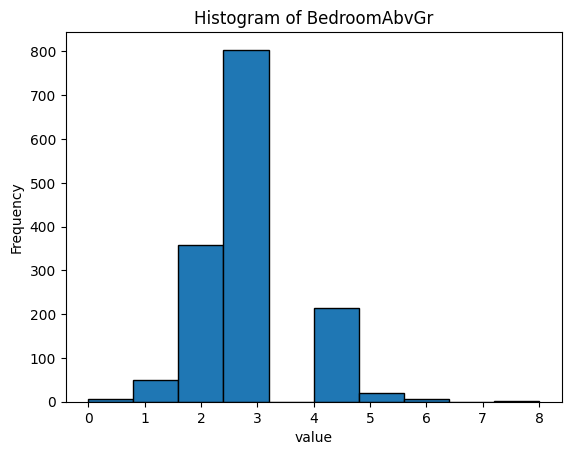

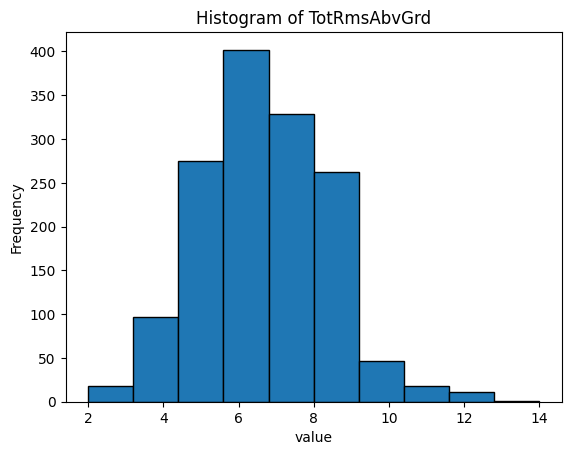

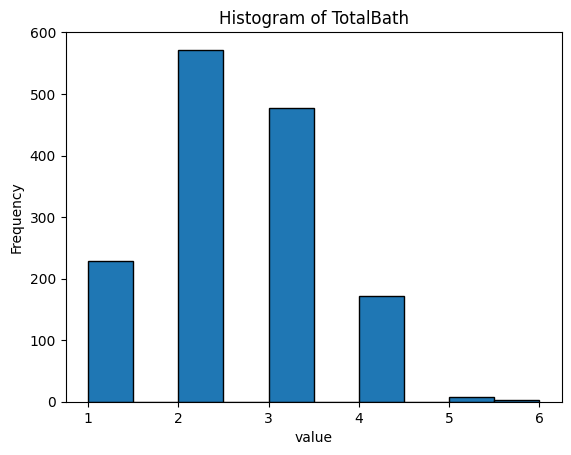

In [24]:

plt.hist(new_dataset['BedroomAbvGr'],bins=10, edgecolor='k')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Histogram of BedroomAbvGr')
plt.show()


plt.hist(new_dataset['TotRmsAbvGrd'],bins=10, edgecolor='k')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Histogram of TotRmsAbvGrd')
plt.show()

plt.hist(new_dataset['TotalBath'],bins=10, edgecolor='k')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Histogram of TotalBath')
plt.show()



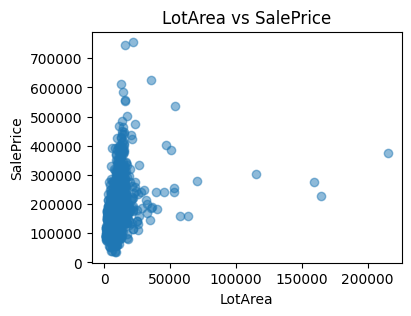

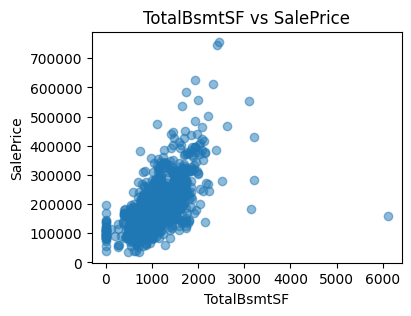

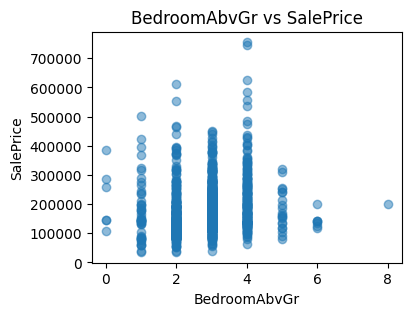

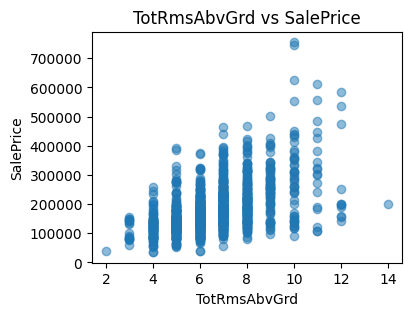

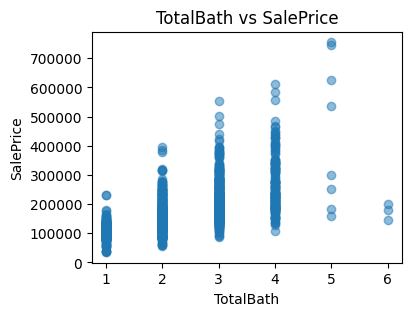

In [27]:
import matplotlib.pyplot as plt

# Assuming 'new_dataset' is your DataFrame
# Create scatter plots for each variable against 'SalePrice'
variables = ['LotArea', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBath']
for var in variables:
    plt.figure(figsize=(4, 3))
    plt.scatter(new_dataset[var], new_dataset['SalePrice'], alpha=0.5)
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()


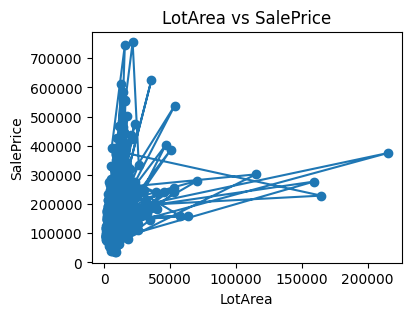

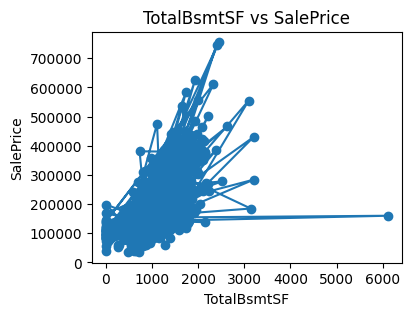

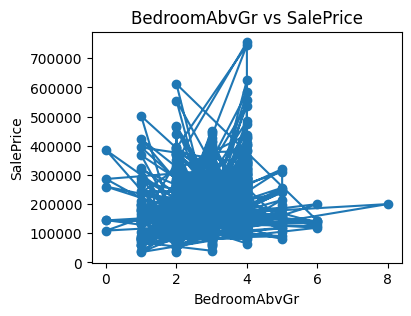

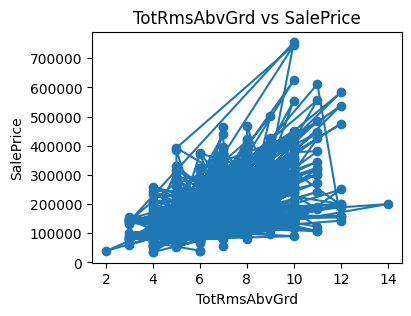

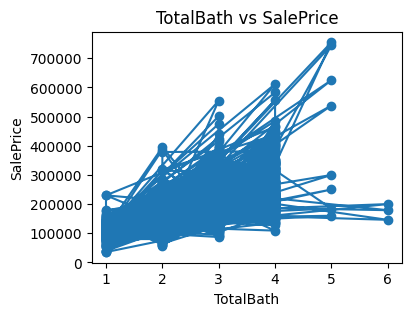

In [29]:
import matplotlib.pyplot as plt

# Assuming 'new_dataset' is your DataFrame
# Create line graphs for each variable against 'SalePrice'
variables = ['LotArea', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBath']
for var in variables:
    plt.figure(figsize=(4, 3))
    plt.plot(new_dataset[var], new_dataset['SalePrice'], marker='o')
    plt.title(f'{var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()


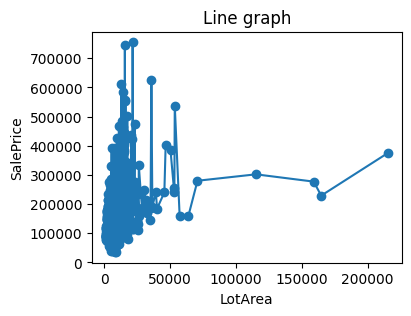

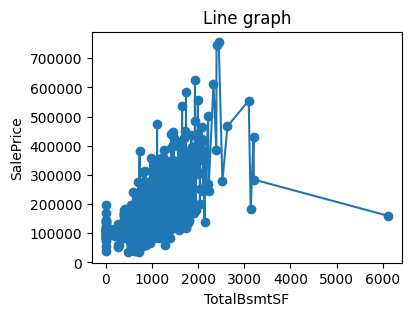

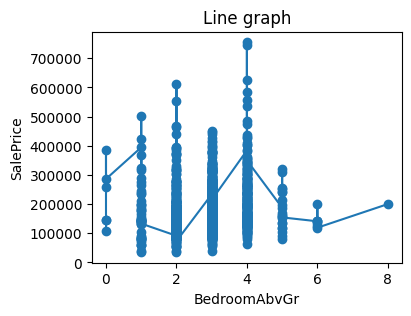

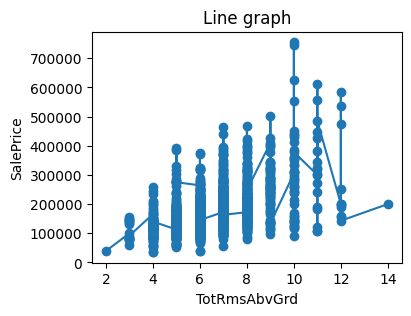

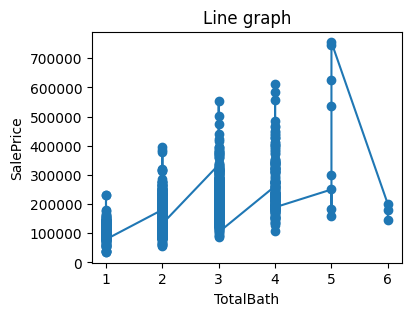

In [30]:
import matplotlib.pyplot as plt

# Assuming 'new_dataset' is your DataFrame
# Create line graphs for each variable against 'SalePrice'
variables = ['LotArea', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBath']
for var in variables:
    sorted_dataset = new_dataset.sort_values(by=var)
    plt.figure(figsize=(4, 3))
    plt.plot(sorted_dataset[var], sorted_dataset['SalePrice'], marker='o')
    plt.title('Line graph')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()


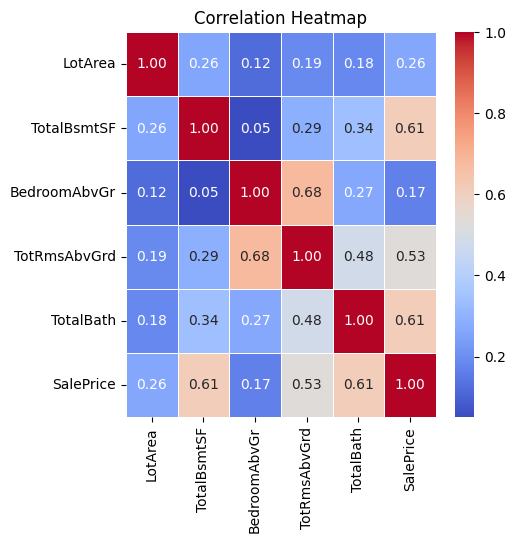

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_dataset' is your DataFrame
# Calculate the correlation matrix
corr_matrix = new_dataset.corr()

# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [34]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
new_dataset = pd.DataFrame(new_dataset)

In [38]:
new_dataset.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
0,8450,856,3,8,4,208500
1,9600,1262,3,6,3,181500
2,11250,920,3,6,4,223500
3,9550,756,3,7,2,140000
4,14260,1145,4,9,4,250000


## Normalize the Data Using Min-Max Scaling:

In [78]:

scaler = MinMaxScaler()

features = new_dataset.drop(columns=['SalePrice'])
target = new_dataset['SalePrice']

scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Include the target column in the scaled DataFrame
scaled_dataset = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)


In [79]:
scaled_dataset.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,TotalBath,SalePrice
0,0.033420,0.140098,0.375,0.500000,0.6,208500
1,0.038795,0.206547,0.375,0.333333,0.4,181500
2,0.046507,0.150573,0.375,0.333333,0.6,223500
3,0.038561,0.123732,0.375,0.416667,0.2,140000
4,0.060576,0.187398,0.500,0.583333,0.6,250000


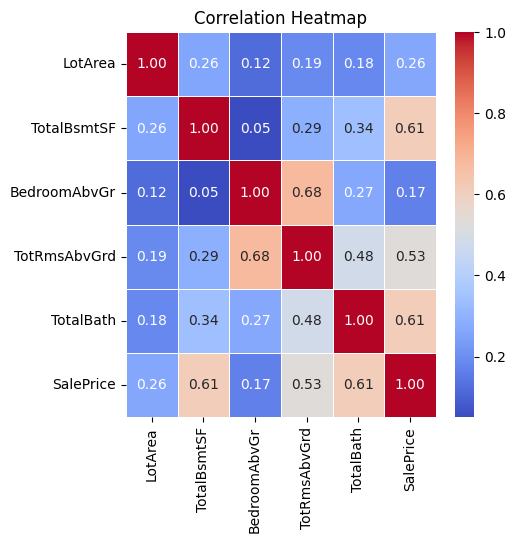

In [80]:

corr_matrix = scaled_dataset.corr()

# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [81]:
X = scaled_dataset.drop(['SalePrice'], axis=1)
Y = scaled_dataset['SalePrice']

In [82]:
print(X)

       LotArea  TotalBsmtSF  BedroomAbvGr  TotRmsAbvGrd  TotalBath
0     0.033420     0.140098         0.375      0.500000        0.6
1     0.038795     0.206547         0.375      0.333333        0.4
2     0.046507     0.150573         0.375      0.333333        0.6
3     0.038561     0.123732         0.375      0.416667        0.2
4     0.060576     0.187398         0.500      0.583333        0.6
...        ...          ...           ...           ...        ...
1455  0.030929     0.155974         0.375      0.416667        0.4
1456  0.055505     0.252373         0.375      0.416667        0.4
1457  0.036187     0.188543         0.500      0.583333        0.2
1458  0.039342     0.176432         0.250      0.250000        0.2
1459  0.040370     0.205565         0.375      0.333333        0.4

[1460 rows x 5 columns]


In [83]:
print(Y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [84]:
#splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 2)

In [85]:
print(X.shape, X_train.shape,X_test.shape)

(1460, 5) (1168, 5) (292, 5)


In [86]:
scaled_dataset.shape

(1460, 6)

## Train a Linear Regression Model:

In [87]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the test data
training_data_prediction = model.predict(X_train)

In [88]:
print(training_data_prediction)

[168762.38825541 161429.34120318 196752.81869309 ... 169804.30036871
 334565.65056086 102191.95427706]


In [89]:
# Calculate the Mean Squared Error and R^2 score
mse = mean_squared_error(Y_train, training_data_prediction)
r2 = r2_score(Y_train, training_data_prediction)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2342984949.053964
R^2 Score: 0.6235260527620649


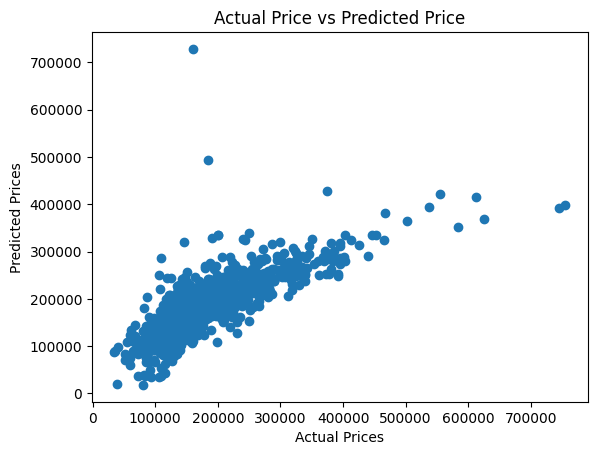

In [90]:
# visualizing the acutal Prices and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [91]:

test_data_prediction = model.predict(X_test)

In [92]:

# Calculate the Mean Squared Error and R^2 score
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2240077760.1298456
R^2 Score: 0.6617354266579086


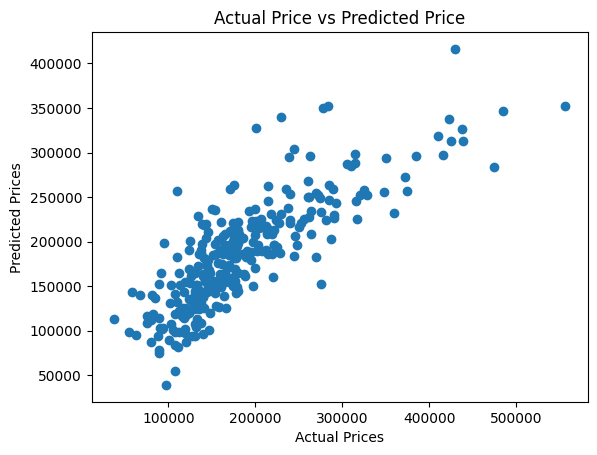

In [93]:
# visualizing the acutal Prices and predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [94]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']

In [95]:
import joblib
import numpy as np

def predict_house_price(input_data):
    # Load the scaler and model
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('model.pkl')

    # Convert input data to numpy array and reshape
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Transform the input data using the loaded scaler
    scaled_input_data = scaler.transform(input_data_reshaped)
    
    # Predict using the loaded model
    prediction = model.predict(scaled_input_data)
    return prediction[0]



In [96]:
input_data = [11622,882,2,5,1]  # Replace with actual values

predicted_price = predict_house_price(input_data)
print(f"The predicted house price is: ${predicted_price:.2f}")

The predicted house price is: $117749.45


C:\Users\r7301\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\r7301\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
import joblib
import numpy as np
import pandas as pd

def predict_house_price_new(input_data):
    # Load the scaler and model
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('model.pkl')

    # Transform the input data using the loaded scaler
    scaled_input_data = scaler.transform(input_data)
    
    # Predict using the loaded model
    predictions = model.predict(scaled_input_data)
    return predictions

# Load the test data from an Excel file
test_data = pd.read_csv(r"C:\Users\r7301\Downloads\ML projects\Prodigy_Infotech\p1\test.csv")

# Extract the features from the test data
test_features = test_data[['LotArea', 'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotalBath']]

# Make predictions for the test data
test_data['PredictedSalePrice'] = predict_house_price_new(test_features)

# Save the results to a new Excel file
test_data.to_excel('test_data_with_predictions.xlsx', index=False)

print("Predictions have been added to the test data and saved to 'test_data_with_predictions.xlsx'")

C:\Users\r7301\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predictions have been added to the test data and saved to 'test_data_with_predictions.xlsx'


In [106]:
test_features.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,TotalBath
0,11622,882,2,5,1
1,14267,1329,3,6,2
2,13830,928,3,6,3
3,9978,926,3,7,3
4,5005,1280,2,5,2


## Congratulations! you have completed you first project. Now, use flask in numpy to deploy on your server AND if you want to deploy for public then use AWS